In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from time import time

In [2]:
plt.rcParams['axes.grid'] = True
plt.gray()

In [3]:
# load data
# read file the original data
feat = pd.read_csv('data/features_tax.csv')
print feat.shape

# read Whole Foods zip codes
zipcode_label = pd.read_csv('data/zipCodeLabel_WholeFoods.csv')
labelWF = zipcode_label['WholeFoods']
print labelWF.shape

(27718, 73)
(27718,)


In [4]:
# log-transform
# copy data to new frame
feat_log = feat.copy()

# shift all features to have minimum zero
feat_log= feat_log-feat_log.min()

feat_log = np.log10(feat_log+1)


### Logistic Regression

In [44]:
# prep data
X= feat_log.copy()
y= labelWF

#X = pd.DataFrame(scale(X), columns=X.columns)
##scaler = StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns);
# data for all WholeFoods
X_WF = X.loc[labelWF==1]

# squeeze y
y = np.squeeze(y)

# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
#res = smf.Logit(y_train,X_train).fit();
#res.summary()

# predict y and round to create label
#print "statsmodel LR"
#y_pred = np.round(res.predict(X_train))
#print "Accuracy train: ", np.sum(y_train==y_pred)/float(len(y_pred))
#y_pred = np.round(res.predict(X_test))
#print "Accuracy test : ", np.sum(y_test==y_pred)/float(len(y_pred))

# scikit-learn Logistic Regression
sLR = LogisticRegression(fit_intercept=True)
sLR.fit(X_train,y_train)
y_pred = sLR.predict(X_test)

print "scikit-learn LR"
print "Accuracy train: ", sLR.score(X_train,y_train)
print "Accuracy test : ", sLR.score(X_test,y_test)

# all whole foods
y_pred_WF = sLR.predict(X_WF)
print "TP: ", np.sum(y_pred_WF==1)/float(len(y_pred_WF))

scikit-learn LR
Accuracy train:  0.985413874858
Accuracy test :  0.987373737374
TP:  0.080310880829


In [9]:
y_pred_WF = sLR.predict(X_WF)
print "TP: ", np.sum(y_pred_WF==1)/float(len(y_pred_WF))


TP:  0.080310880829


In [22]:

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index = pd.MultiIndex.from_product([['actual'], ['no_WF','is_WF']]),
             columns = pd.MultiIndex.from_product([['predicted'], ['no_WF','is_WF']]))


predicted      
                 no_WF is_WF
actual no_WF      8204    14
       is_WF        91     7

In [24]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index = pd.MultiIndex.from_product([['actual'], ['no_WF','is_WF']]),
             columns = pd.MultiIndex.from_product([['predicted'], ['no_WF','is_WF']]))


predicted      
                 no_WF is_WF
actual no_WF      8096   122
       is_WF        83    15

In [16]:
y_pred[:10]


(8316,)

In [22]:
cross_validation.train_test_split?

In [5]:
# use similar function from Textmining lab
def plot_roc_curve(target_test, target_predicted_proba, labelText):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba, 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: ROC curve (area = {:.3f})'.format(labelText,roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.axis = 'True'
    plt.rcParams['axes.grid'] = True
    plt.gray()

time 4.6 min


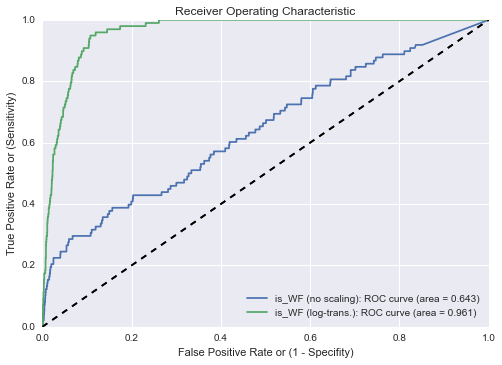

In [6]:
# plot ROC curve

t0 = time()
# build model and show ROC curve
X= feat.copy()
y= labelWF
# squeeze y
y = np.squeeze(y)
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)
# fit model: scikit-learn Logistic Regression
sLR = LogisticRegression(fit_intercept=True)
sLR.fit(X_train,y_train)
y_pred = sLR.predict_proba(X_test)
y_pred = y_pred[:,1]
plot_roc_curve(y_test, y_pred,'is_WF (no scaling)')

# log-transform
X= feat_log.copy()
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)
# fit model: scikit-learn Logistic Regression
sLR = LogisticRegression(fit_intercept=True)
sLR.fit(X_train,y_train)
y_pred = sLR.predict_proba(X_test)
y_pred = y_pred[:,1]
plot_roc_curve(y_test, y_pred,'is_WF (log-trans.)')

print("time %.2g min" % ((time()-t0)/60))

plt.savefig("figures/LR_roc.pdf")

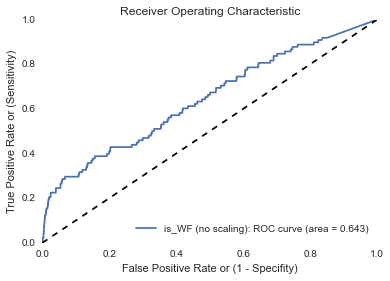

In [65]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)
y_pred = sLR.predict_proba(X_test)
y_pred = y_pred[:,1]
plot_roc_curve(y_test, y_pred,'is_WF (no scaling)')
plt.rcParams['axes.grid'] = True
plt.gray()

### Different Thresholds

In [5]:

# log-transform
X= feat_log.copy()
y= labelWF
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5, random_state=12)
# fit model: scikit-learn Logistic Regression
sLR = LogisticRegression(fit_intercept=True)
sLR.fit(X_train,y_train)
y_pred = sLR.predict_proba(X_test)
y_pred = y_pred[:,1]

#plt.savefig("figures/LR_roc.pdf")

# create different thresholds and calculate the accuracy
n = 50
threshList = np.arange(n+1)/float(n) # list of thresholds
accu_set = []
TP_set = []
TN_set = []

for t in threshList:
    y_pred_tmp = (y_pred>=t)
    
    accu = np.sum(y_test==y_pred_tmp)/float(len(y_pred_tmp))
    TP   = np.sum((y_test==y_pred_tmp) & (y_test==1))/float(np.sum(y_test==1))
    TN   = np.sum((y_test==y_pred_tmp) & (y_test==0))/float(np.sum(y_test==0))
    
    print "t = %0.1f: Accuracy= %0.3f, TP= %0.3f, TN= %0.3f" % (t, accu, TP, TN)
    
    # store values
    accu_set.append(accu)
    TP_set.append(TP)
    TN_set.append(TN)

t = 0.0: Accuracy= 0.013, TP= 1.000, TN= 0.000
t = 0.0: Accuracy= 0.880, TP= 0.966, TN= 0.879
t = 0.0: Accuracy= 0.921, TP= 0.897, TN= 0.921
t = 0.1: Accuracy= 0.942, TP= 0.799, TN= 0.943
t = 0.1: Accuracy= 0.954, TP= 0.718, TN= 0.957
t = 0.1: Accuracy= 0.962, TP= 0.678, TN= 0.966
t = 0.1: Accuracy= 0.968, TP= 0.621, TN= 0.973
t = 0.1: Accuracy= 0.971, TP= 0.523, TN= 0.977
t = 0.2: Accuracy= 0.975, TP= 0.477, TN= 0.981
t = 0.2: Accuracy= 0.977, TP= 0.431, TN= 0.984
t = 0.2: Accuracy= 0.979, TP= 0.385, TN= 0.987
t = 0.2: Accuracy= 0.981, TP= 0.374, TN= 0.989
t = 0.2: Accuracy= 0.982, TP= 0.339, TN= 0.991
t = 0.3: Accuracy= 0.983, TP= 0.293, TN= 0.992
t = 0.3: Accuracy= 0.983, TP= 0.247, TN= 0.993
t = 0.3: Accuracy= 0.984, TP= 0.207, TN= 0.994
t = 0.3: Accuracy= 0.985, TP= 0.190, TN= 0.995
t = 0.3: Accuracy= 0.985, TP= 0.172, TN= 0.995
t = 0.4: Accuracy= 0.986, TP= 0.167, TN= 0.996
t = 0.4: Accuracy= 0.986, TP= 0.138, TN= 0.997
t = 0.4: Accuracy= 0.986, TP= 0.138, TN= 0.997
t = 0.4: Accu

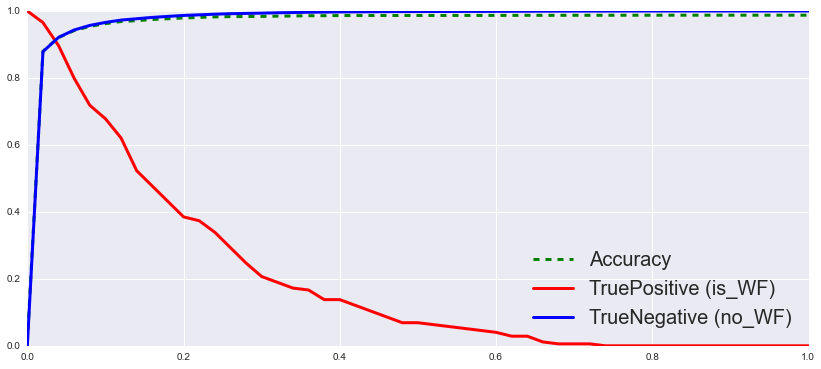

In [9]:
# plot the result
plt.figure(figsize=(14,6))
_ = plt.plot(threshList,accu_set,'g--', linewidth=3.0, label='Accuracy')
_ = plt.plot(threshList,TP_set,'r', linewidth=3.0, label='TruePositive (is_WF)')
_ = plt.plot(threshList,TN_set,'b', linewidth=3.0, label='TrueNegative (no_WF)')

plt.legend(fontsize=20,loc='lower right')

plt.savefig("figures/LR_thresholds.pdf")

In [52]:
plt.plot?